# Principal Component Analysis

The **principal component analysis** (**PCA**) is a non-parametric method of **factor extraction** applied to *continuous numerical variables*. The PCA is often used to reduce the dimension of a data set (**dimensionality reduction**) since few extracted factors, also known as **principal components**, retain most of the variability in the data.

In this notebook, we shall apply PCA to extract factors from the [datasets](http://archive.ics.uci.edu/ml/datasets/Student+Performance) of *UCI Machine Learning Repository* that contains grades, demographics, and social information of students at secondary education level in mathematics and Portuguese language subjects (see **README** file). We also shall verify each factor in order to build a new data set with fewer dimensions.

## Libraries

In [2]:
# Numerical library
import numpy as np

# Libraries to handle data
import pandas as pd
from scripts import data_wrangling as dw

# Graphs
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Magic commands
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Dataset

Since PCA is restricted to *continuous numerical variables*, we must filter non-continuous variables from the datasets to properly perform this method. We shall build a single dataframe with the grades of the two subjects, mathematics and Portuguese language. Overall, there will be 6 variables in the dataframe: `mat_G1`, `mat_G2`, `mat_G3`, `por_G1`, `por_G2`, and `por_G3`. To perform this task, we made the class `Dataset` from the Python script `scripts/data_wrangling.py`.

In [44]:
# Dataset object from the script data_wrangling
dataset = dw.Dataset()

# Get dataset from students with grades in both subjects
df = dataset.get_df(subject = 'both', dtype = 'float')
    
# Let us rescale the grades so that the maximum will be 10 instead of 20
df *= 0.5

df

,G1_mat,G2_mat,G3_mat,G1_por,G2_por,G3_por
0,2.5,3.0,3.0,0.0,5.5,5.5
1,2.5,2.5,3.0,4.5,5.5,5.5
2,3.5,4.0,5.0,6.0,6.5,6.0
3,7.5,7.0,7.5,7.0,7.0,7.0
4,3.0,5.0,5.0,5.5,6.5,6.5
...,...,...,...,...,...,...
377,3.5,4.5,4.0,7.5,7.5,8.0
378,3.0,2.5,0.0,3.5,4.0,3.5
379,3.0,2.5,0.0,5.5,6.0,4.5
380,7.0,8.0,8.0,5.0,5.0,5.0


### Descriptive statistics

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
G1_mat,382.0,5.430628,1.674584,1.5,4.000,5.25,6.5,9.5
G2_mat,382.0,5.356021,1.916280,0.0,4.125,5.50,6.5,9.5
G3_mat,382.0,5.193717,2.343620,0.0,4.000,5.50,7.0,10.0
G1_por,382.0,6.056283,1.278266,0.0,5.000,6.00,7.0,9.5
G2_por,382.0,6.119110,1.234171,2.5,5.500,6.00,7.0,9.5
G3_por,382.0,6.257854,1.472719,0.0,5.500,6.50,7.0,9.5


From the dataframe above:

- the majority of students are $17 \pm 1$ years old since the 1st quartile of the age variable is 16 and the 3rd quartile is 18;

- Most students do not have past class failures since the 3rd quartile of the failures variable is 0;

- Most students are present in most classes;

- The first, second, and final grades are similar centered at the same value, 5.5.

Text(0.5, 0.98, 'Histograms and boxplots of each numerical variable')

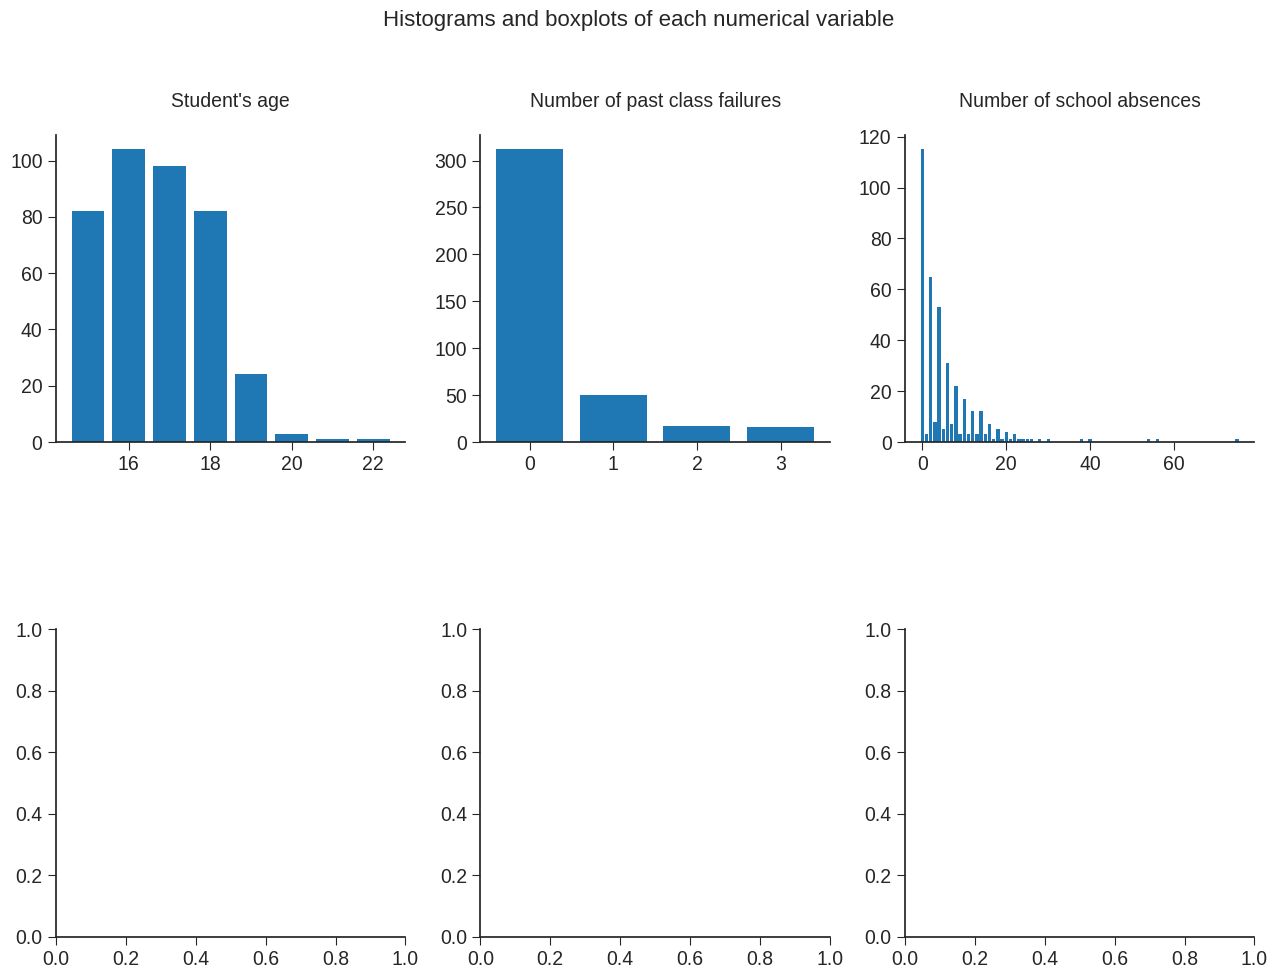

In [41]:
#----- Figure and axis -----#

# Figure
fig = plt.figure(figsize = (13, 10), dpi = 100)

# Grid
gs = fig.add_gridspec(nrows = 8, ncols = 3)

# Histograms
hist_axs = []
for i in range(2):
    for j in range(3):
        hist_axs.append(fig.add_subplot(gs[4*i+1:4*i+4, j]))
        
        # Remove spines
        hist_axs[-1].spines[['top', 'right']].set_visible(False)
        
# Boxplots
boxplot_axs = []
for i in range(2):
    for j in range(3):
        boxplot_axs.append(fig.add_subplot(gs[4*i, j]))
        
        # Remove spines
        boxplot_axs[-1].spines[:].set_visible(False)
        
        # Remove yaxis
        boxplot_axs[-1].yaxis.set_visible(False)
        boxplot_axs[-1].xaxis.set_tick_params(bottom = False, labelbottom = False)
        
#----- Plots -----#

# Discrete variables
discrete_vars = ['age', 'failures', 'absences']
titles = ["Student's age", "Number of past class failures", "Number of school absences"]

for i in range(3):
    data = mat_df[discrete_vars[i]].value_counts()
    x = data.index.values
    y = data.to_numpy()
    hist_axs[i].bar(x, y)
    
    # Labels
    hist_axs[i].set_title(titles[i], fontsize = 14, pad = 20)

        
#----- Appearance -----#

plt.style.use('seaborn-ticks')
plt.rcParams.update({
        'font.size': 14
    })
plt.tight_layout()

#----- Labels, legends and annotations -----#

# Title
plt.suptitle('Histograms and boxplots of each numerical variable', fontsize = 16)

## Correlation matrix

## Data Screening

### Low Correlations

#### Kaiser-Meyer-Olkin test

#### Bartlett's sphericity test

### Multicollinearity

Since the process of finding **factors** is basically a **multiple linear regression problem**, we must make sure of the lack of **multicollinearity**, which is a strong or perfect (**singularity**) linear relation between two or more variables.